##Contexto do Desafio

Ajudar o Senhor João a decidir qual loja da sua rede Alura Store vender para iniciar um novo empreendimento.
Para isso, você analisará dados de vendas, desempenho e avaliações das 4 lojas fictícias da Alura Store.
O objetivo é identificar a loja com menor eficiência e apresentar uma recomendação final baseada nos dados.

### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


##Conhecendo o Dataset
###Estrutura dos Dados- O dataset inclui as seguintes informações:

Produto e Categoria: Itens vendidos e suas classificações.

Preço e Frete: Valores das vendas e custos associados.

Data de Compra e Local: Informações temporais e geográficas.

Avaliação da Compra: Feedback dos clientes.

Tipo de Pagamento e Parcelas: Métodos utilizados pelos clientes.

Coordenadas Geográficas: Localização das transações.

# Teste pra ver se influencia o produto a menos na lista 4


In [3]:
print(f"Loja 1: {len(loja)} linhas")
print(f"Loja 2: {len(loja2)} linhas")
print(f"Loja 3: {len(loja3)} linhas")
print(f"Loja 4: {len(loja4)} linhas")

Loja 1: 2359 linhas
Loja 2: 2359 linhas
Loja 3: 2359 linhas
Loja 4: 2358 linhas


In [4]:
print(loja.shape, loja2.shape, loja3.shape, loja4.shape)  # Confirma tamanho de cada tabela antes da união

(2359, 12) (2359, 12) (2359, 12) (2358, 12)


In [5]:
produtos_loja1 = set(loja["Produto"])
produtos_loja4 = set(loja4["Produto"])

diferenca = produtos_loja1 - produtos_loja4
print("Produtos que estão na Loja 1, mas faltam na Loja 4:")
print(diferenca)

Produtos que estão na Loja 1, mas faltam na Loja 4:
set()


####Resultado
A Loja 4 não tem um produto faltando em relação às outras lojas. O único registro a menos pode ser um erro no banco de dados ou uma venda que não foi registrada corretamente.
A diferença de faturamento da Loja 4 não é causada pela ausência de produtos, mas sim pelos preços médios mais baixos, como vimos antes.


### Criação DataFrame Unificado

In [6]:
import pandas as pd

# Criando uma tabela única a partir das tabelas individuais
loja["Lojas"] = "Loja 1"
loja2["Lojas"] = "Loja 2"
loja3["Lojas"] = "Loja 3"
loja4["Lojas"] = "Loja 4"

df_unificado = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

print(df_unificado.head())  # Verifica se a coluna 'loja' está correta # Confirma se a coluna 'loja' foi adicionada
pd.set_option('display.max_rows', None)



                 Produto Categoria do Produto    Preço      Frete  \
0     Assistente virtual          eletronicos   219.08   9.249790   
1         Mesa de jantar               moveis   256.35  11.234305   
2      Jogo de tabuleiro           brinquedos   279.51  21.262681   
3            Micro-ondas     eletrodomesticos  1009.99  54.667344   
4  Cadeira de escritório               moveis   446.99  26.964689   

  Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0     16/01/2021     Pedro Gomes              SP                    4   
1     18/05/2022  Beatriz Moraes              RJ                    1   
2     15/03/2021      João Souza              DF                    1   
3     03/05/2022      João Souza              RS                    4   
4     07/11/2020   Larissa Alves              MG                    5   

  Tipo de pagamento  Quantidade de parcelas    lat    lon   Lojas  
0    cartao_credito                       8 -22.19 -48.79  Loja 1  
1    carta

In [7]:
# Exibir as primeiras linhas para conferir
print(df_unificado.shape)

(9435, 13)


In [8]:
pd.set_option("display.max_rows", None)  # Exibe todas as linhas
pd.set_option("display.max_columns", None)  # Exibe todas as colunas
print(df_unificado)

                          Produto   Categoria do Produto    Preço       Frete  \
0              Assistente virtual            eletronicos   219.08    9.249790   
1                  Mesa de jantar                 moveis   256.35   11.234305   
2               Jogo de tabuleiro             brinquedos   279.51   21.262681   
3                     Micro-ondas       eletrodomesticos  1009.99   54.667344   
4           Cadeira de escritório                 moveis   446.99   26.964689   
5                Blocos de montar             brinquedos    32.26    0.000000   
6                     Boneca bebê             brinquedos    58.90    0.000000   
7                     Lava louças       eletrodomesticos  1586.23   84.993080   
8              Lavadora de roupas       eletrodomesticos  2024.31  105.372857   
9        Carrinho controle remoto             brinquedos   100.26    6.737659   
10                      Geladeira       eletrodomesticos  3241.75  170.197874   
11                    Lava l

In [9]:
print(df_unificado.columns)  # Lista os nomes das colunas no dataframe consolidado

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Lojas'],
      dtype='object')


#1. Análise do faturamento


In [10]:
print(type(loja))  # Isso mostrará se `loja` é um DataFrame ou uma string

<class 'pandas.core.frame.DataFrame'>


###Faturamento total por loja
Mostra o total de receita gerada por cada loja.

In [11]:
faturamento_total_por_loja = df_unificado.groupby("Lojas")["Preço"].sum()
print("Faturamento Total por Loja:")
print(faturamento_total_por_loja.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")))



Faturamento Total por Loja:
Lojas
Loja 1    R$ 1.534.509,12
Loja 2    R$ 1.488.459,06
Loja 3    R$ 1.464.025,03
Loja 4    R$ 1.384.497,58
Name: Preço, dtype: object


###Faturamento médio por loja

In [12]:
faturamento_medio_por_loja = df_unificado.groupby("Lojas")["Preço"].mean()
print("Faturamento Médio por Loja:")
print(faturamento_medio_por_loja.apply(lambda x: f"R$ {x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")))

Faturamento Médio por Loja:
Lojas
Loja 1    R$ 650,49
Loja 2    R$ 630,97
Loja 3    R$ 620,61
Loja 4    R$ 587,15
Name: Preço, dtype: object


###Comparação faturamento total entre lojas

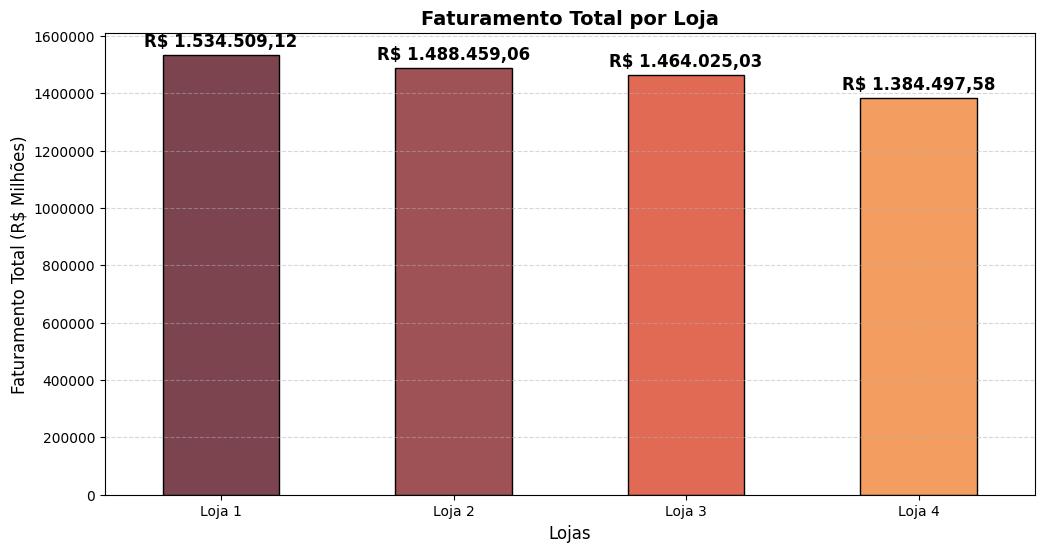

In [82]:
import matplotlib.pyplot as plt

# Configurando o tamanho do gráfico antes de plotar
fig, ax = plt.subplots(figsize=(12, 6))

# Cores personalizadas
cores = ["#7C444F", "#9F5255", "#E16A54", "#F39E60"]

# Criando gráfico de barras
faturamento_total_por_loja.plot(kind="bar", color=cores, edgecolor="black", ax=ax)

# Adicionando rótulos nas barras
for i, v in enumerate(faturamento_total_por_loja):
    ax.text(i, v + (v * 0.02), f"R$ {v:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."), ha="center", fontsize=12, fontweight="bold")

# Ajustes no layout do gráfico
plt.title("Faturamento Total por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Faturamento Total (R$ Milhões)", fontsize=12)
plt.ticklabel_format(style="plain", axis="y")  # Evita notação científica
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Exibir o gráfico
plt.show()

Por meio do grafico é possivel comparar a performance geral de cada loja,  mostra qual loja gerou mais receita no período. Isso é útil para entender qual unidade é mais lucrativa.



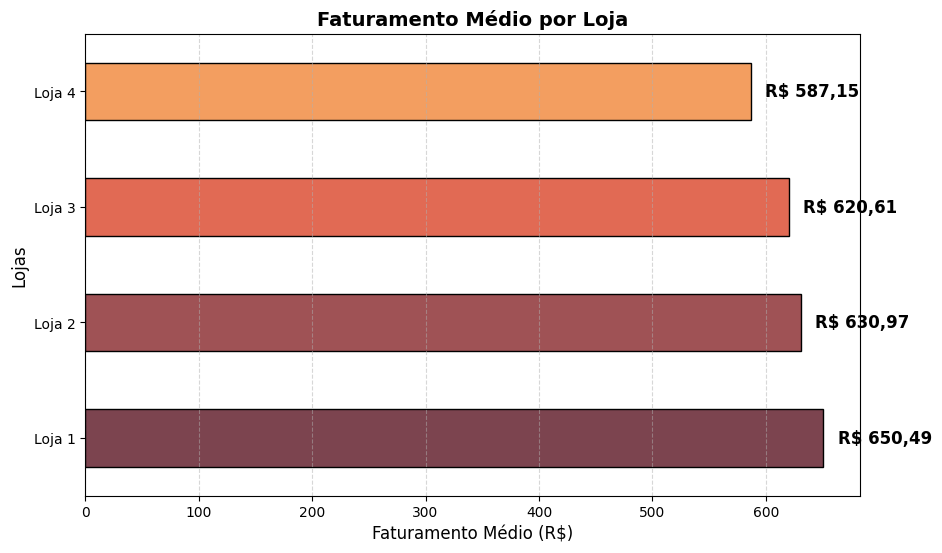

In [14]:
import matplotlib.pyplot as plt

# Criando o gráfico
faturamento_medio_por_loja = faturamento_medio_por_loja.astype(float)  # Garante que os valores são numéricos
ax = faturamento_medio_por_loja.plot(kind="barh", color=["#7C444F","#9F5255", "#E16A54","#F39E60"], figsize=(10, 6), edgecolor="black")

# Adicionando rótulos nas barras
for i, v in enumerate(faturamento_medio_por_loja):
    ax.text(v + (v * 0.02), i, f"R$ {v:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."), va="center", fontsize=12, fontweight="bold")

plt.title("Faturamento Médio por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Faturamento Médio (R$)", fontsize=12)
plt.ylabel("Lojas", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Exibir o gráfico
plt.show()

###Analise do grafico:
Diferença de ticket médio entre as lojas → Algumas lojas têm valores médios mais altos, indicando que seus clientes gastam mais por compra.
Comparação direta → O formato horizontal permite que vejamos rapidamente qual loja tem maior faturamento médio e qual tem o menor.
Impacto na estratégia → Lojas com ticket médio menor podem estar vendendo produtos mais baratos ou atraindo um público diferente.


###Margem de lucro por loja

In [15]:
custo_total_por_loja = df_unificado.groupby("Lojas")["Frete"].sum()
margem_lucro_por_loja = (faturamento_total_por_loja - custo_total_por_loja) / faturamento_total_por_loja * 100
print(margem_lucro_por_loja)

Lojas
Loja 1    94.666831
Loja 2    94.671391
Loja 3    94.670674
Loja 4    94.672734
dtype: float64


# 2. Vendas por Categoria


###Quantidade vendas para cada categoria dentro de cada loja

In [32]:
produtos_vendidos_por_categoria = df_unificado.groupby(["Lojas", "Categoria do Produto"])["Produto"].count().reset_index()
produtos_vendidos_por_categoria.rename(columns={"Produto": "Quantidade_Vendas"}, inplace=True)
print(produtos_vendidos_por_categoria)

categorias_mais_populares = produtos_vendidos_por_categoria.sort_values(["Lojas", "Quantidade_Vendas"], ascending=[True, False])
print(categorias_mais_populares.groupby("Lojas").head(1))  # Mostra a categoria mais vendida por loja

     Lojas   Categoria do Produto  Quantidade_Vendas
0   Loja 1             brinquedos                324
1   Loja 1       eletrodomesticos                312
2   Loja 1            eletronicos                448
3   Loja 1        esporte e lazer                284
4   Loja 1  instrumentos musicais                182
5   Loja 1                 livros                173
6   Loja 1                 moveis                465
7   Loja 1  utilidades domesticas                171
8   Loja 2             brinquedos                313
9   Loja 2       eletrodomesticos                305
10  Loja 2            eletronicos                422
11  Loja 2        esporte e lazer                275
12  Loja 2  instrumentos musicais                224
13  Loja 2                 livros                197
14  Loja 2                 moveis                442
15  Loja 2  utilidades domesticas                181
16  Loja 3             brinquedos                315
17  Loja 3       eletrodomesticos             

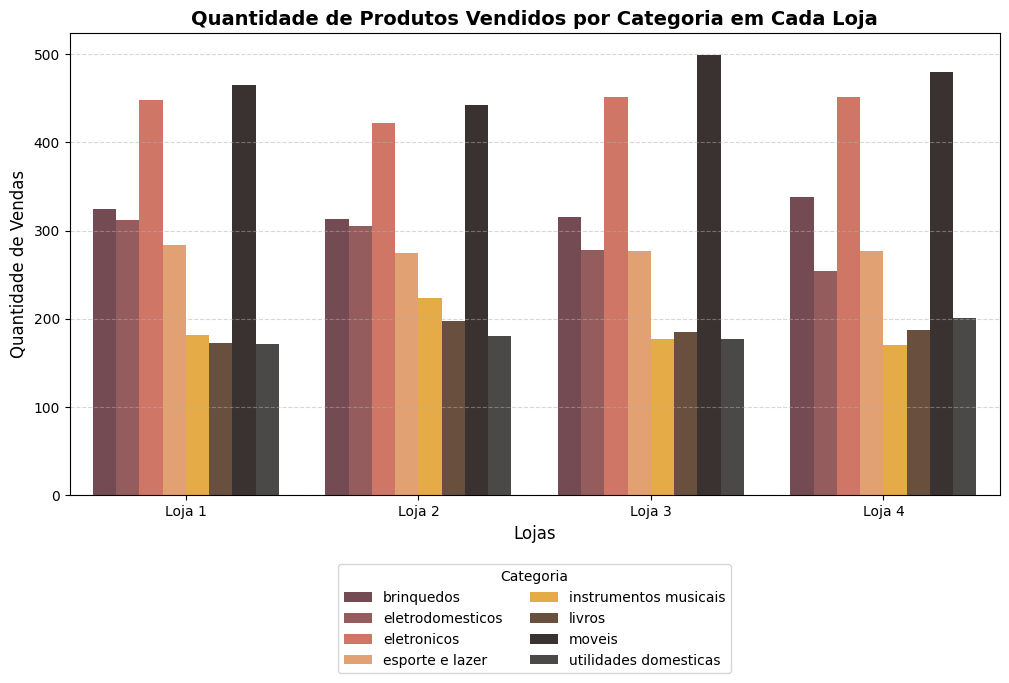

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=produtos_vendidos_por_categoria, x="Lojas", y="Quantidade_Vendas", hue="Categoria do Produto", palette=["#7C444F","#9F5255", "#E16A54","#F39E60", "#FFB22C","#6F4E37","#3B3030","#4A4947"])

plt.title("Quantidade de Produtos Vendidos por Categoria em Cada Loja", fontsize=14, fontweight="bold")
plt.xlabel("Lojas", fontsize=12)
plt.ylabel("Quantidade de Vendas", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Categoria", loc="lower center", bbox_to_anchor=(0.5, -0.4), ncol=2)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

###Preço médio por categoria para cada loja


In [20]:
preco_medio_por_categoria = df_unificado.groupby(["Lojas", "Categoria do Produto"])["Preço"].mean()
preco_medio_por_categoria = preco_medio_por_categoria.apply(lambda x: f"R$ {x:,.2f}")
print(preco_medio_por_categoria)

Lojas   Categoria do Produto 
Loja 1  brinquedos                  R$ 74.05
        eletrodomesticos         R$ 1,554.21
        eletronicos              R$ 1,278.26
        esporte e lazer            R$ 184.46
        instrumentos musicais      R$ 668.86
        livros                      R$ 67.71
        moveis                     R$ 538.02
        utilidades domesticas       R$ 99.01
Loja 2  brinquedos                  R$ 67.93
        eletrodomesticos         R$ 1,523.80
        eletronicos              R$ 1,298.04
        esporte e lazer            R$ 168.46
        instrumentos musicais      R$ 624.94
        livros                      R$ 68.30
        moveis                     R$ 532.21
        utilidades domesticas      R$ 108.63
Loja 3  brinquedos                  R$ 82.12
        eletrodomesticos         R$ 1,579.08
        eletronicos              R$ 1,214.41
        esporte e lazer            R$ 171.32
        instrumentos musicais      R$ 582.91
        livros           

# 3. Média de Avaliação das Lojas

In [35]:
media_avaliacoes_por_loja = df_unificado.groupby("Lojas")["Avaliação da compra"].mean().reset_index()
media_avaliacoes_por_loja.rename(columns={"Avaliação da compra": "Média_Avaliações"}, inplace=True)

print(media_avaliacoes_por_loja)

    Lojas  Média_Avaliações
0  Loja 1          3.976685
1  Loja 2          4.037304
2  Loja 3          4.048326
3  Loja 4          3.995759


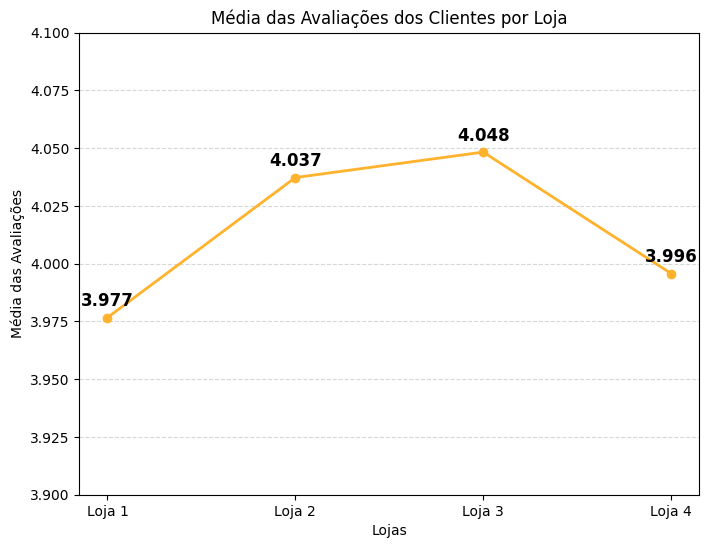

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Criando o gráfico de linhas
plt.plot(media_avaliacoes_por_loja["Lojas"], media_avaliacoes_por_loja["Média_Avaliações"], marker="o", linestyle="-", color="#FFB22C", linewidth=2)

plt.xlabel("Lojas")
plt.ylabel("Média das Avaliações")
plt.title("Média das Avaliações dos Clientes por Loja")
plt.ylim(3.9, 4.1)  # Ajusta escala para focar nas diferenças sutis
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Exibir os valores nos pontos do gráfico
for i, v in enumerate(media_avaliacoes_por_loja["Média_Avaliações"]):
    plt.text(i, v + 0.005, f"{v:.3f}", ha="center", fontsize=12, fontweight="bold")

plt.show()

# 4. Produtos Mais e Menos Vendidos

In [40]:
produtos_vendidos_por_loja = df_unificado.groupby(["Lojas", "Produto"])["Produto"].count().reset_index(name="Quantidade_Vendas")

produtos_vendidos_por_loja_sorted = produtos_vendidos_por_loja.sort_values(["Lojas", "Quantidade_Vendas"], ascending=[True, False])

mais_vendidos_por_loja = produtos_vendidos_por_loja_sorted.groupby("Lojas").head(1)  # Produto mais vendido por loja
menos_vendidos_por_loja = produtos_vendidos_por_loja_sorted.groupby("Lojas").tail(1)  # Produto menos vendido por loja

print("Mais vendidos:")
print(mais_vendidos_por_loja)
print("\nMenos vendidos:")
print(menos_vendidos_por_loja)


Mais vendidos:
      Lojas                   Produto  Quantidade_Vendas
24   Loja 1             Guarda roupas                 60
79   Loja 2  Iniciando em programação                 65
134  Loja 3             Kit banquetas                 57
161  Loja 4                  Cama box                 62

Menos vendidos:
      Lojas            Produto  Quantidade_Vendas
26   Loja 1            Headset                 33
82   Loja 2  Jogo de tabuleiro                 32
105  Loja 3   Blocos de montar                 35
178  Loja 4           Guitarra                 33


<ipython-input-47-007f818a9887>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados_loja, x="Quantidade_Vendas", y="Produto", palette=["#7C444F","#9F5255", "#E16A54","#F39E60", "#FFB22C"])


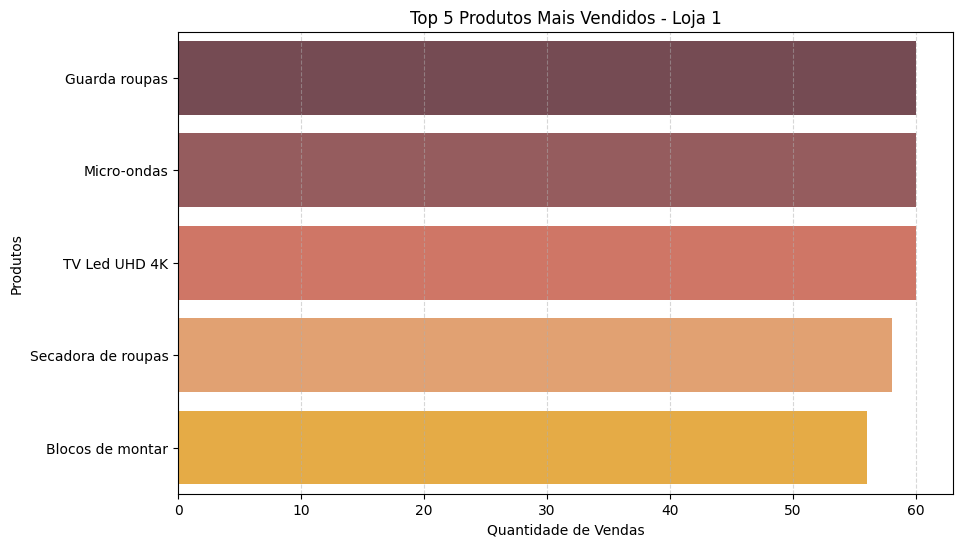

<ipython-input-47-007f818a9887>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados_loja, x="Quantidade_Vendas", y="Produto", palette=["#7C444F","#9F5255", "#E16A54","#F39E60", "#FFB22C"])


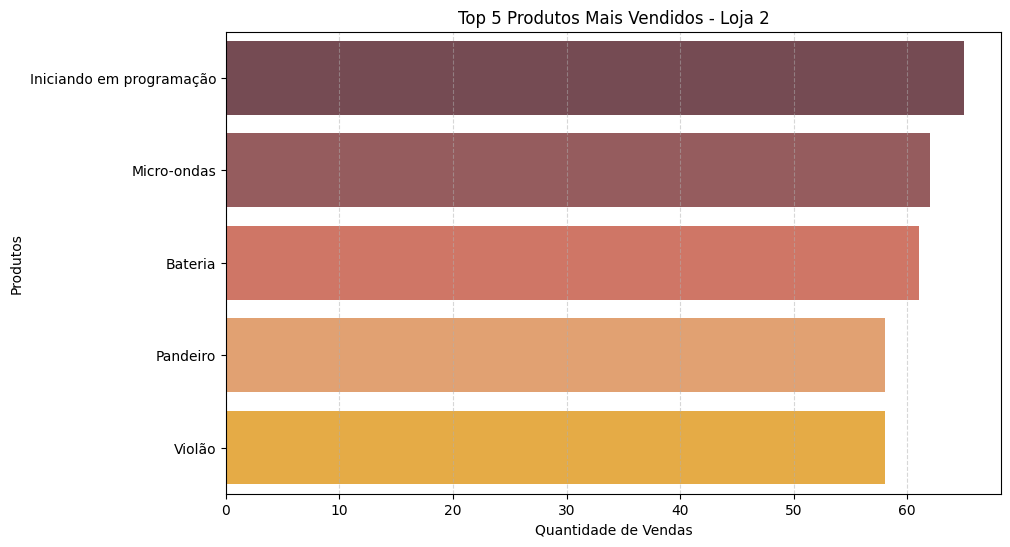

<ipython-input-47-007f818a9887>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados_loja, x="Quantidade_Vendas", y="Produto", palette=["#7C444F","#9F5255", "#E16A54","#F39E60", "#FFB22C"])


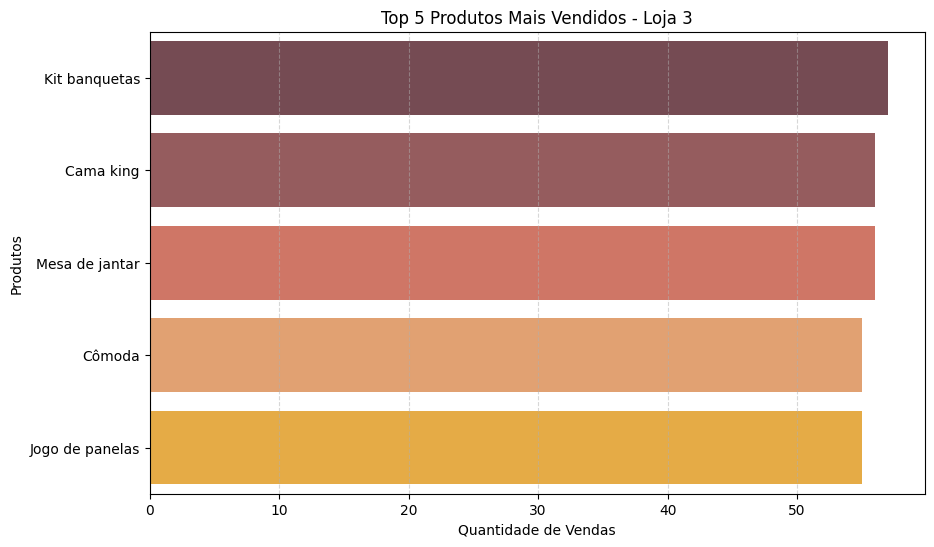

<ipython-input-47-007f818a9887>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados_loja, x="Quantidade_Vendas", y="Produto", palette=["#7C444F","#9F5255", "#E16A54","#F39E60", "#FFB22C"])


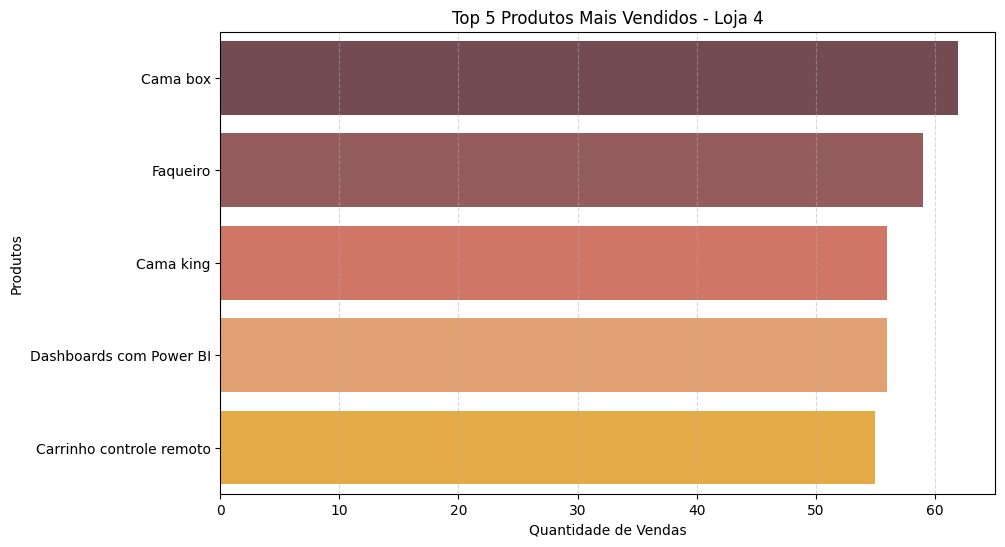

In [47]:
import seaborn as sns

for loja in lojas:
    dados_loja = produtos_vendidos_por_loja_sorted[produtos_vendidos_por_loja_sorted["Lojas"] == loja].head(5)  # Top 5 produtos

    plt.figure(figsize=(10, 6))
    sns.barplot(data=dados_loja, x="Quantidade_Vendas", y="Produto", palette=["#7C444F","#9F5255", "#E16A54","#F39E60", "#FFB22C"])

    plt.title(f"Top 5 Produtos Mais Vendidos - {loja}")
    plt.xlabel("Quantidade de Vendas")
    plt.ylabel("Produtos")
    plt.grid(axis="x", linestyle="--", alpha=0.5)

    plt.show()

###Por categoria

# 5. Frete Médio por Loja


Pelos valores apresentados, os custos médios de frete por loja são relativamente próximos, sem grandes discrepâncias. A diferença entre a loja com maior custo de 34,69 e a loja com menor custo de 31,27é de aproximadamente R$3,41, o que indica uma variação pequena e consistente.



In [48]:
custo_medio_frete_por_loja = df_unificado.groupby("Lojas")["Frete"].mean().reset_index()
custo_medio_frete_por_loja.rename(columns={"Frete": "Custo_Médio_Frete"}, inplace=True)

print(custo_medio_frete_por_loja)

    Lojas  Custo_Médio_Frete
0  Loja 1          34.691805
1  Loja 2          33.621941
2  Loja 3          33.074464
3  Loja 4          31.278997


In [22]:
custo_medio_frete_por_regiao = df_unificado.groupby("Local da compra")["Frete"].mean()
print(custo_medio_frete_por_regiao)

Local da compra
AC     49.361324
AL     33.258053
AM     29.368488
AP     21.646223
BA     30.257176
CE     25.002442
DF     30.185782
ES     33.199995
GO     38.129811
MA     35.129564
MG     33.460381
MS     33.694141
MT     32.691573
PA     30.633504
PB     33.910674
PE     35.720970
PI     36.948903
PR     34.569335
RJ     33.935633
RN     40.090987
RO     46.347240
RR    113.673032
RS     36.582407
SC     29.838897
SE     30.487058
SP     32.709219
TO     33.462289
Name: Frete, dtype: float64


###Usando as coordenadas geográficas para mapear as vendas e explorar padrões que possam influenciar o desempenho das lojas.

###  Criação do gráfico de dispersão com latitude e longitude
Ajuda a visualizar onde as vendas estão concentradas no mapa, visão inicial da distribuição das vendas!




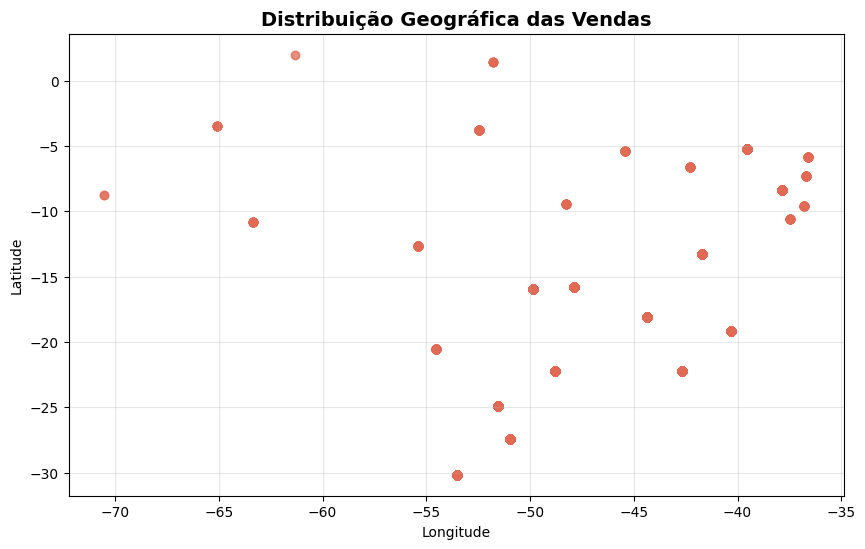

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_unificado["lon"], df_unificado["lat"], alpha=0.5, c="#E16A54")

plt.title("Distribuição Geográfica das Vendas", fontsize=14, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.3)

plt.show()

###Mapa de calor para destacar áreas de maior volume de vendas

Com o heatMap podemos visualizar regiões de alta concentração de compras.


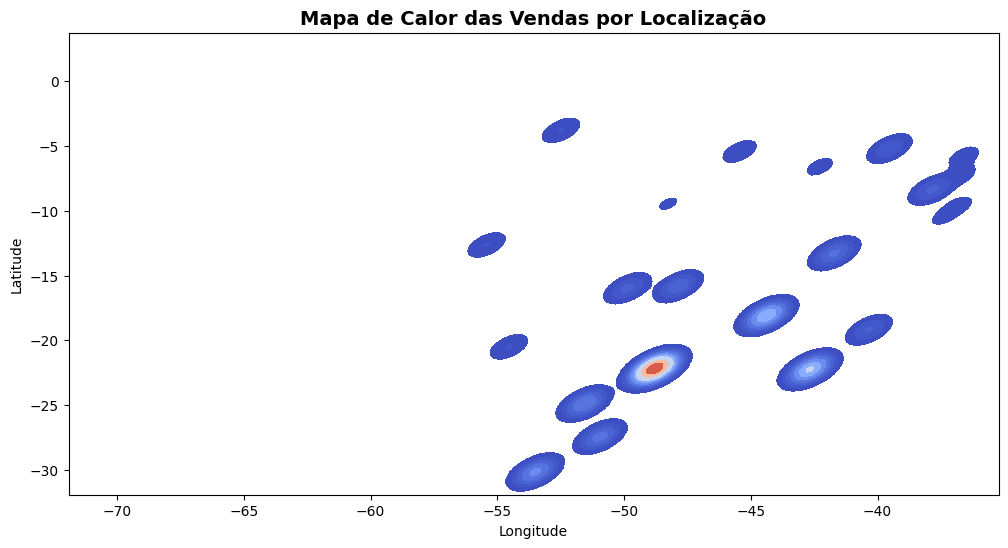

In [52]:
plt.figure(figsize=(12, 6))
sns.kdeplot(x=df_unificado["lon"], y=df_unificado["lat"], cmap="coolwarm", fill=True, bw_adjust=0.5)

plt.title("Mapa de Calor das Vendas por Localização", fontsize=14, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

###Analisar desempenho por loja e localização
Isso nos permite comparar se alguma loja tem maior influência em determinadas regiões.



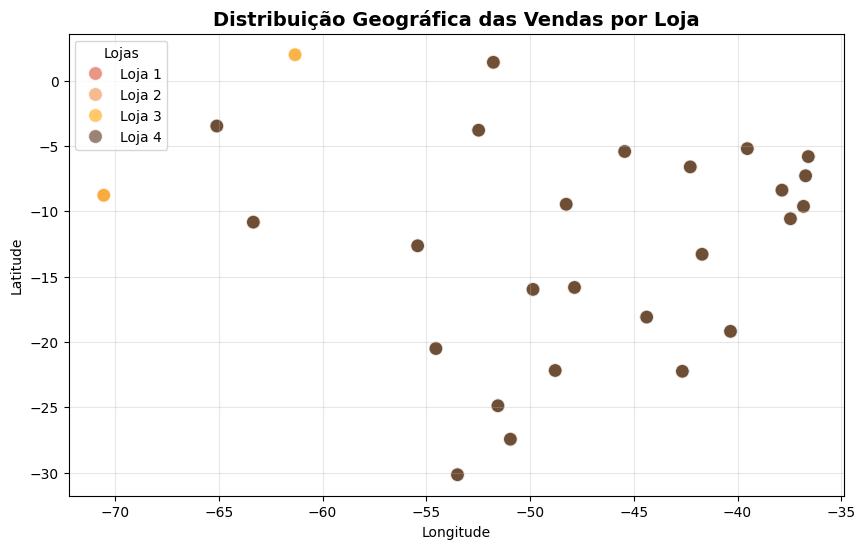

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_unificado, x="lon", y="lat", hue="Lojas", palette=["#E16A54","#F39E60", "#FFB22C","#6F4E37"], alpha=0.7, s=100)

plt.title("Distribuição Geográfica das Vendas por Loja", fontsize=14, fontweight="bold")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Lojas")
plt.grid(alpha=0.3)

plt.show()

#Relatório Final: ✅
